<a href="https://colab.research.google.com/github/fouad89/nlp-tutorial/blob/main/classification_using_tfidf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.pipeline import Pipeline
# text preprocessing
import re
import nltk
import gensim.downloader as api


In [34]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [4]:
data_path = '/content/drive/MyDrive/Datasets/bbc-text.csv'

In [15]:
def read_data(data_path):
    return pd.read_csv(data_path)

def get_data_info(df):
    print(df.info())
    print(f'Description: \n{df.describe()}')
    print()
    print(f'Number of rows {df.shape[0]}, Number of Columns: {df.shape[1]}')
    print()
    print(f'Number of Null values {df.isnull().sum()}')
    print()
    print(f'Columns: {df.columns}')

In [6]:
df = read_data(data_path)
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [16]:
get_data_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB
None
Description: 
       category                                               text
count      2225                                               2225
unique        5                                               2126
top       sport  kennedy questions trust of blair lib dem leade...
freq        511                                                  2

Number of rows 2225, Number of Columns: 2

Number of Null values category    0
text        0
dtype: int64

Columns: Index(['category', 'text'], dtype='object')


Text(0, 0.5, '')

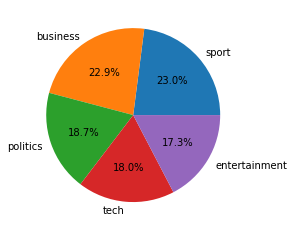

In [20]:
df['category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')

# Preprocessing

1. convert to lower cases, remove special characters, …
2. tokenize (i.e. convert from strings to lists of words)
3. remove stopwords (i.e. remove common words that bring noise to the system, like ‘a’, ‘the’, …)
4. stemm (i.e. remove -ing, -ly, …, like convert ‘making’ to ‘make’, so that words with same meaning are identified as being the same)
5. lemmatize (i.e convert the word into a root word, for example ‘feet’ becomes ‘foot’)

In [36]:
stop_words = nltk.corpus.stopwords.words('english')
def preprocessing(text, stm_flg=False, lem_flg=False, stop_words=stop_words):
    text = str(text).lower().strip()
    text = text.split()
    text = [word for word in text if word not in set(stop_words)]

    if stm_flg:
        stemmer = nltk.stem.porter.PorterStemmer()
        text = [stemmer.stem(word) for word in text]
    if lem_flg:
        lemma = nltk.stem.wordnet.WordNetLemmatizer()
        text = [lemma.lemmatize(word) for word in text]

    return ' '.join(text)




In [37]:
preprocessing(df['text'][0], lem_flg=True)


'tv future hand viewer home theatre system plasma high-definition tv digital video recorder moving living room way people watch tv radically different five year time. according expert panel gathered annual consumer electronics show la vega discus new technology impact one favourite pastimes. u leading trend programme content delivered viewer via home network cable satellite telecom company broadband service provider front room portable devices. one talked-about technology ce digital personal video recorder (dvr pvr). set-top box like u tivo uk sky+ system allow people record store play pause forward wind tv programme want. essentially technology allows much personalised tv. also built-in high-definition tv set big business japan u slower take europe lack high-definition programming. people forward wind advert also forget abiding network channel schedule putting together a-la-carte entertainment. u network cable satellite company worried mean term advertising revenue well brand identity

In [39]:
# stop words
df['clean_text'] = df['text'].apply(lambda x: preprocessing(x, lem_flg=True))

In [40]:
df.head()

,category,text,clean_text
0,tech,tv future in the hands of viewers with home th...,tv future hand viewer home theatre system plas...
1,business,worldcom boss left books alone former worldc...,worldcom bos left book alone former worldcom b...
2,sport,tigers wary of farrell gamble leicester say ...,tiger wary farrell gamble leicester say rushed...
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelve raid box office ocean twelve crim...


# Splitting Data

In [45]:
X = df['clean_text']
y = df['category']
# Onehot encode target
# y = LabelBinarizer().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42,
                                                    stratify=df['category'])

print(f'Shape of X_train is: { X_train.shape}')
print(f'Shape of X_test is: { X_test.shape}')
print(f'Shape of y_train is: { y_train.shape}')
print(f'Shape of y_test is: { y_test.shape}')


Shape of X_train is: (1557,)
Shape of X_test is: (668,)
Shape of y_train is: (1557,)
Shape of y_test is: (668,)


In [46]:
Max_WORDS = 1500
NGRAM_RANGE = (1,2)
tf_idf = TfidfVectorizer(max_features=Max_WORDS, ngram_range=NGRAM_RANGE)
tf_idf.fit(X_train)

TfidfVectorizer(max_features=1500, ngram_range=(1, 2))

In [49]:
clf_logistic = LogisticRegression()
model_pipeline = Pipeline([
                           ('vectorizer', tf_idf),
                           ('clf', clf_logistic)
])

In [50]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_features=1500, ngram_range=(1, 2))),
                ('clf', LogisticRegression())])

In [51]:
train_preds = model_pipeline.predict(X_train)
test_preds = model_pipeline.predict(X_test)

In [55]:
def evaluate_model(y_true, y_preds, name):
    acc = accuracy_score(y_true, y_preds)
    clf_report = classification_report(y_true, y_preds)
    print(f'{name}')
    print(f'Accuracy: {acc}')
    print()
    print(f'Classifcation Report:\n{clf_report}')
    cm = confusion_matrix(y_true, y_preds, normalize='true')

    print(cm)
    fig, ax = plt.subplots(figsize=(6,6))


    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_true.unique())
    disp.plot(cmap='Blues', values_format='.2f', ax=ax, colorbar=False)
    plt.xticks(rotation=45)
    plt.title(f'{name} Normalized Confusion Matrix')
    plt.show()

Train
Accuracy: 0.9929351316634554

Classifcation Report:
               precision    recall  f1-score   support

     business       0.99      0.99      0.99       357
entertainment       1.00      1.00      1.00       270
     politics       0.99      0.99      0.99       292
        sport       0.99      1.00      1.00       357
         tech       0.99      0.99      0.99       281

     accuracy                           0.99      1557
    macro avg       0.99      0.99      0.99      1557
 weighted avg       0.99      0.99      0.99      1557

[[0.99159664 0.         0.00280112 0.         0.00560224]
 [0.         0.9962963  0.0037037  0.         0.        ]
 [0.00342466 0.         0.98630137 0.00342466 0.00684932]
 [0.00280112 0.         0.         0.99719888 0.        ]
 [0.         0.00355872 0.         0.00355872 0.99288256]]


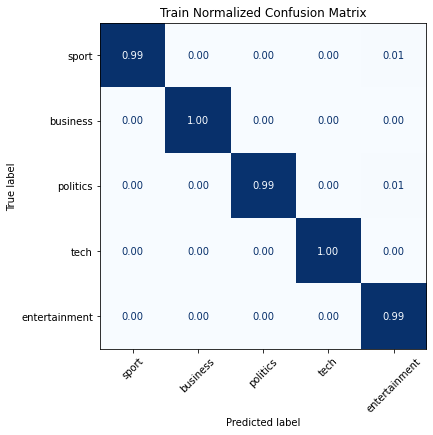

In [56]:
evaluate_model(y_train, train_preds, 'Train')

Test
Accuracy: 0.968562874251497

Classifcation Report:
               precision    recall  f1-score   support

     business       0.95      0.97      0.96       153
entertainment       0.97      0.97      0.97       116
     politics       0.94      0.95      0.95       125
        sport       0.99      1.00      1.00       154
         tech       0.97      0.95      0.96       120

     accuracy                           0.97       668
    macro avg       0.97      0.97      0.97       668
 weighted avg       0.97      0.97      0.97       668

[[0.96732026 0.00653595 0.01960784 0.         0.00653595]
 [0.00862069 0.96551724 0.02586207 0.         0.        ]
 [0.016      0.008      0.952      0.008      0.016     ]
 [0.         0.         0.         1.         0.        ]
 [0.03333333 0.00833333 0.00833333 0.         0.95      ]]


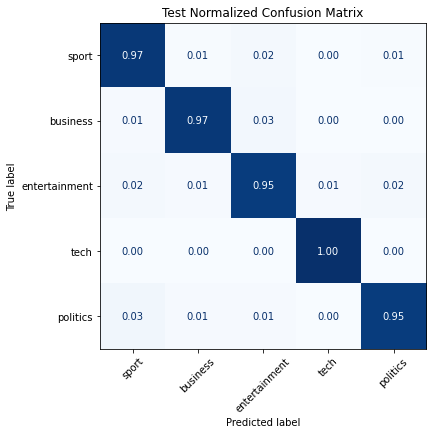

In [57]:
evaluate_model(y_test, test_preds, 'Test')

## Model Analysis

In [58]:
print(f'Model Classes: {model_pipeline.classes_}')

Model Classes: ['business' 'entertainment' 'politics' 'sport' 'tech']


In [62]:
voc = tf_idf.vocabulary_
NN = 10
# Get the 10 (here: NN, which you can adjust yourself) ids of the words with highest weights per category
top_words = np.argsort(clf_logistic.coef_,axis=1)[:,-NN:]
# inverse map
inv_voc = {v:k for k,v in voc.items()}
print(inv_voc)

{560: 'future', 827: 'manager', 834: 'mark', 1104: 'refused', 1402: 'two', 746: 'last', 1: '10', 763: 'league', 563: 'game', 260: 'chairman', 1285: 'steve', 287: 'claim', 240: 'cannot', 1492: 'year', 940: 'old', 791: 'liverpool', 1153: 'said', 933: 'offered', 519: 'financial', 337: 'could', 56: 'action', 1347: 'them', 518: 'finance', 1287: 'still', 288: 'claimed', 77: 'agreed', 932: 'offer', 62: 'added', 95: 'also', 55: 'act', 375: 'decided', 78: 'agreement', 448: 'end', 146: 'august', 534: 'following', 543: 'former', 1333: 'team', 317: 'conference', 1364: 'title', 1174: 'season', 1373: 'took', 1277: 'start', 779: 'life', 1326: 'taking', 293: 'club', 1350: 'third', 1143: 'round', 482: 'fa', 353: 'cup', 1471: 'winning', 1345: 'the', 876: 'month', 154: 'award', 930: 'october', 541: 'form', 377: 'defeat', 1494: 'year old', 1329: 'target', 350: 'cross', 339: 'country', 414: 'double', 942: 'olympic', 262: 'champion', 1199: 'set', 821: 'make', 1481: 'world', 263: 'championship', 549: 'france

In [64]:
top_words[0]

array([ 228,  607, 1043, 1056,  436,  835, 1203,  163,  524,  307])

In [70]:
for n, category in enumerate(model_pipeline.classes_):
    print(category,': ')
    for i in range(NN):
        if i!=NN-1:
            print(inv_voc[top_words[n, i]], end=',')
        else:
            print(inv_voc[top_words[n, i]])
    print()



business : 
business,growth,price,profit,economic,market,share,bank,firm,company

entertainment : 
chart,award,album,tv,singer,band,star,music,show,film

politics : 
mp,blair,election,tory,lord,minister,labour,mr,government,party

sport : 
olympic,season,team,coach,win,cup,player,champion,club,match

tech : 
site,digital,people,online,mobile,user,software,technology,computer,game

